# Importing required libraries 

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [14]:

exp_df = pd.read_csv("C:/Users/39351/github/Eu_healthcare_spending_analysis/data/raw/eu_health_expending.csv", compression='gzip')
life_df = pd.read_csv("C:/Users/39351/github/Eu_healthcare_spending_analysis/data/raw/life-expectancy.csv", compression='gzip')
mort_df = pd.read_csv("C:/Users/39351/github/Eu_healthcare_spending_analysis/data/raw/mortality_rate.csv", compression='gzip')


# Cleaning the Data

In [59]:

exp_df.head()
exp_df.columns, exp_df.shape
exp_df['Classification of health care financing schemes - SHA 2011'].value_counts()

# remove unnecessary columns
exp_clean = exp_df[['geo',
        'Geopolitical entity (reporting)', 'TIME_PERIOD', 'unit', 'icha11_hf','Classification of health care financing schemes - SHA 2011', 'OBS_VALUE']]


# renaming the columns
exp_clean.rename(columns={
    'geo': 'Country Code',
    'Geopolitical entity (reporting)': 'Country Name', 
    'TIME_PERIOD': 'Year', 
    'unit': 'Unit', 
    'icha11_hf': 'Financing Code',
    'Classification of health care financing schemes - SHA 2011': 'Category', 
    'OBS_VALUE': 'Spending'
}, inplace=True)

exp_clean['Unit'].value_counts()
# exp_clean.head()
exp_clean.to_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/Cleaned_health_spending.csv')

C:\Users\39351\AppData\Local\Temp\ipykernel_26396\3514256760.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_clean.rename(columns={


In [60]:
life_df.head()
life_df.columns, life_df.shape

#remove unnecessary information
life_clean = life_df[['geo', 'Geopolitical entity (reporting)', 'Unit of measure', 
                      'sex', 'age', 'Age class', 
                      'TIME_PERIOD', 'OBS_VALUE']]

# rename columns
life_clean.rename(columns={
    'geo': 'Country Code', 
    'Geopolitical entity (reporting)': 'Country Name', 
    'Unit of measure': 'unit',
    'sex': 'Gender', 
    'age': 'Age', 
    'Age class': 'Age Class',
    'TIME_PERIOD': 'Year', 
    'OBS_VALUE': 'Life Expectancy'  
}, inplace=True)

life_clean.head()
# life_clean['Age'].value_counts()
life_clean.to_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/Cleaned_life_expectancy.csv')


C:\Users\39351\AppData\Local\Temp\ipykernel_26396\3121727190.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_clean.rename(columns={


In [62]:
mort_df.head()
mort_df.columns, mort_df.shape

# remove unnecessary columns
mort_clean = mort_df[['geo', 'Geopolitical entity (reporting)','Type of mortality', 
                      'sex', 'icd10','Unit of measure','TIME_PERIOD', 'OBS_VALUE']]

mort_clean.rename(columns={
    'geo': 'Country Code', 
    'Geopolitical entity (reporting)': 'Country Name',
    'Type of mortality': 'Type of Mortality', 
    'sex': 'Gender', 
    'icd10': 'Diseas',
    'Unit of measure': 'Unit',
    'TIME_PERIOD': 'Year', 
    'OBS_VALUE': 'Mortality Rate'
}, inplace=True)

mort_clean.head()
mort_clean.to_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/Cleaned_mortality_rate.csv')

C:\Users\39351\AppData\Local\Temp\ipykernel_26396\3192663005.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_clean.rename(columns={


# Merging data

In [73]:
## Find common countries and year in the datasets
common_countries = set(exp_clean['Country Code']).intersection(life_clean['Country Code'], mort_clean['Country Code'])
common_years = set(exp_clean['Year']).intersection(life_clean['Year'], mort_clean['Year'])

# Filter the data
exp_filtered = exp_clean[exp_clean['Country Code'].isin(common_countries) & exp_clean['Year'].isin(common_years)]
life_filtered = life_clean[life_clean['Country Code'].isin(common_countries) & life_clean['Year'].isin(common_years)]
mort_filtered = mort_clean[mort_clean['Country Code'].isin(common_countries) & mort_clean['Year'].isin(common_years)]


# Merge the datasets on Country code and year
merged_data = exp_filtered.merge(
    life_filtered, on=['Country Code', 'Year'], how='inner'
    ).merge(
        mort_filtered, on=['Country Code', 'Year'],
        how='inner'
    )

merged_data.head()

,Country Code,Country Name_x,Year,Unit_x,Financing Code,Category,Spending,Country Name_y,unit,Gender_x,Age,Age Class,Life Expectancy,Country Name,Type of Mortality,Gender_y,Diseas,Unit_y,Mortality Rate
0,AT,Austria,2012,EUR_HAB,HF121,Social health insurance schemes,1678.79,Austria,Year,F,Y1,1 year,82.8,Austria,Preventable mortality,F,TOTAL,Rate,96.16
1,AT,Austria,2012,EUR_HAB,HF121,Social health insurance schemes,1678.79,Austria,Year,F,Y1,1 year,82.8,Austria,Preventable mortality,M,TOTAL,Rate,252.28
2,AT,Austria,2012,EUR_HAB,HF121,Social health insurance schemes,1678.79,Austria,Year,F,Y1,1 year,82.8,Austria,Preventable mortality,T,TOTAL,Rate,170.95
3,AT,Austria,2012,EUR_HAB,HF121,Social health insurance schemes,1678.79,Austria,Year,F,Y1,1 year,82.8,Austria,Total,F,TOTAL,Rate,165.88
4,AT,Austria,2012,EUR_HAB,HF121,Social health insurance schemes,1678.79,Austria,Year,F,Y1,1 year,82.8,Austria,Total,M,TOTAL,Rate,343.73


In [ ]:
# saved the merged data into CSV file
merged_data.to_csv('C:/Users/39351/github/Eu_healthcare_spending_analysis/data/cleaned/merged_eu_health_data.csv')

# Spending vs Life Expectancy

<function matplotlib.pyplot.show(close=None, block=None)>

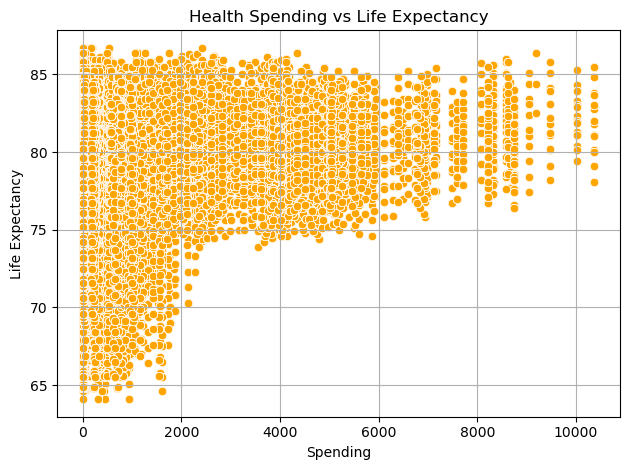

In [80]:
sns.scatterplot(data=merged_data, x='Spending', y='Life Expectancy', color='Orange')
plt.title('Health Spending vs Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show

# Spending vs Mortality Rate

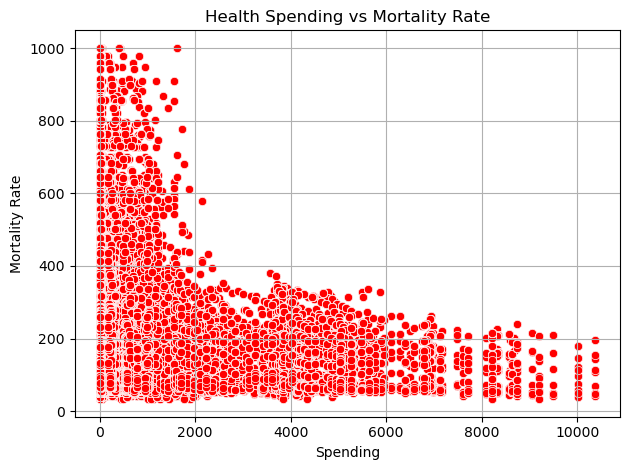

In [82]:
sns.scatterplot(data=merged_data, x='Spending', y='Mortality Rate', color='Red')
plt.title('Health Spending vs Mortality Rate')
plt.grid(True)
plt.tight_layout()
plt.show()